In [20]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  r2_score


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout

In [3]:
df = pd.read_csv('./house_prices.csv')

In [4]:
df.head()

,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.dtypes

Transaction                     float64
House age                       float64
Distance to MRT station         float64
Number of convenience stores      int64
Latitude                        float64
Longitude                       float64
House unit price                float64
dtype: object

<AxesSubplot:>

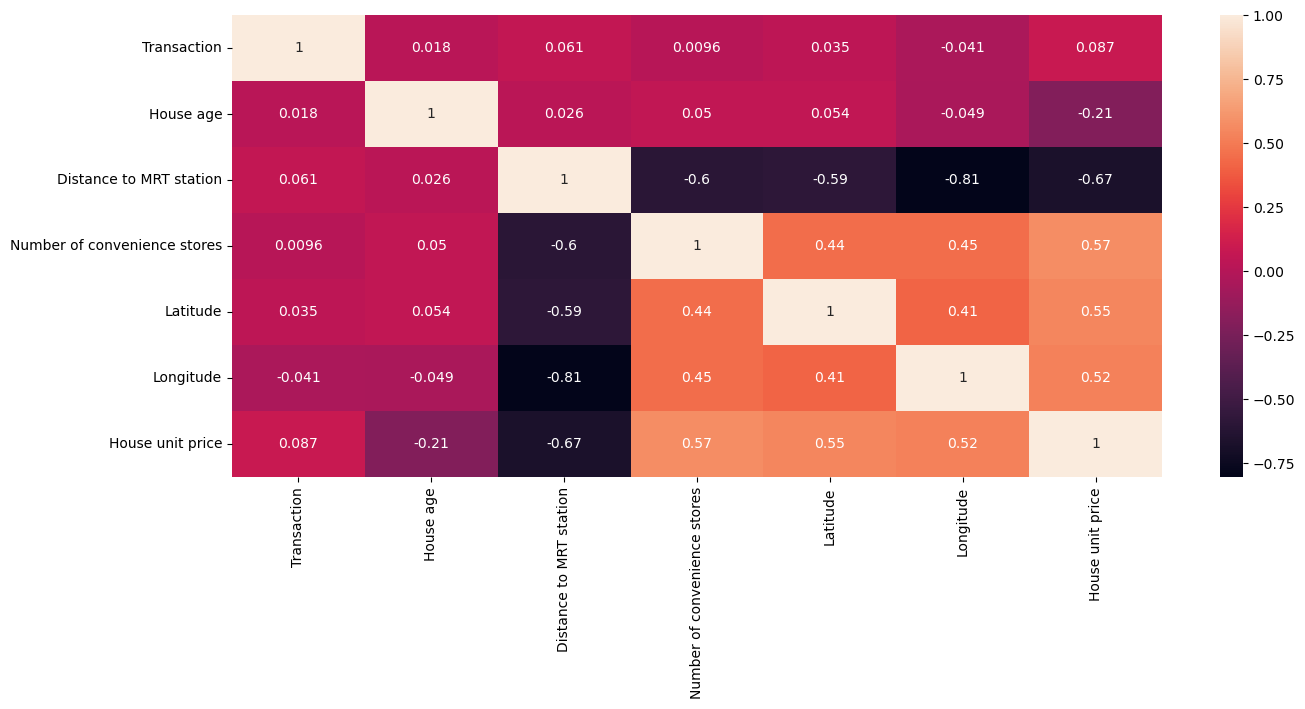

In [7]:
corr = df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True)

In [29]:
X = df.drop(columns=['House unit price'])

In [9]:
y = df['House unit price']

In [30]:
X.shape

(414, 6)

In [31]:
y.shape

(414,)

In [32]:
for i in X.columns:
    X[i] = (X[i] - X[i].min())/ (X[i].max() - X[i].min())

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .2)

In [34]:
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(331, 6) (331,) (83, 6) (83,)


In [35]:
model = LinearRegression()

In [36]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [45]:
print(f"Linear regression score: {model.score(Xtrain, ytrain) * 100}%")

Linear regression score: 54.512113402609664%


In [47]:
ypred_LR = model.predict(Xtest)

In [48]:
r2_score(ytest, ypred_LR)

0.7260553727547114

In [49]:
ada_clf = AdaBoostRegressor()

In [50]:
ada_clf.fit(Xtrain, ytrain)

AdaBoostRegressor()

In [51]:
print(f"AdaBoostRegressor score: {ada_clf.score(Xtrain, ytrain) * 100}%")

AdaBoostRegressor score: 78.98844443220187%


In [52]:
ypred_ABR = ada_clf.predict(Xtest)

In [53]:
r2_score(ytest, ypred_ABR)

0.7044535750041752

In [54]:
#####Using Neural Network